In [44]:
import random
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Define the Ant class
class Ant:
    def __init__(self, num_cities):
        self.num_cities = num_cities
        self.tour = []
        self.visited = [False] * num_cities
        self.total_distance = 0.0

    def reset(self):
        self.tour = []
        self.visited = [False] * self.num_cities
        self.total_distance = 0.0

    def visit_city(self, city):
        self.tour.append(city)
        self.visited[city] = True

    def is_visited(self, city):
        return self.visited[city]


In [45]:
# Define the Ant Colony Optimization class
class ACO:
    def __init__(self, num_ants, num_iterations, alpha, beta, rho, q):
        self.num_ants = num_ants
        self.num_iterations = num_iterations
        self.alpha = alpha
        self.beta = beta
        self.rho = rho
        self.q = q
        self.pheromone_matrix = None

    def initialize_pheromone_matrix(self, num_cities):
        self.pheromone_matrix = np.ones((num_cities, num_cities))

    def run(self, distance_matrix):
        num_cities = len(distance_matrix)
        self.initialize_pheromone_matrix(num_cities)
        best_distance = float('inf')
        best_tour = []

        for iteration in range(self.num_iterations):
            ants = [Ant(num_cities) for _ in range(self.num_ants)]
            
            for ant in ants:
                ant.reset()
                ant.visit_city(random.randint(0, num_cities - 1))

            for _ in range(num_cities - 1):
                for ant in ants:
                    current_city = ant.tour[-1]
                    next_city = self.select_next_city(ant, distance_matrix)
                    ant.visit_city(next_city)
                    ant.total_distance += distance_matrix[current_city][next_city]

            self.update_pheromone_matrix(ants, distance_matrix)

            # Update the best tour and distance
            if ants[0].total_distance < best_distance:
                best_distance = ants[0].total_distance
                best_tour = ants[0].tour.copy()

        return best_tour, best_distance

    def select_next_city(self, ant, distance_matrix):
        current_city = ant.tour[-1]
        unvisited_cities = [city for city in range(len(ant.visited)) if not ant.is_visited(city)]
        probabilities = []

        for city in unvisited_cities:
            pheromone = self.pheromone_matrix[current_city][city]
            attractiveness = 1.0 / distance_matrix[current_city][city]
            probability = pheromone ** self.alpha * attractiveness ** self.beta
            probabilities.append(probability)

        probabilities = np.array(probabilities)
        probabilities /= np.sum(probabilities)
        next_city = np.random.choice(unvisited_cities, p=probabilities)

        return next_city

    def update_pheromone_matrix(self, ants, distance_matrix):
        num_cities = len(distance_matrix)
        delta_pheromone = np.zeros((num_cities, num_cities))

        for ant in ants:
            for i in range(num_cities - 1):
                city1, city2 = ant.tour[i], ant.tour[i + 1]
                delta_pheromone[city1][city2] += self.q / ant.total_distance

        self.pheromone_matrix *= (1 - self.rho)
        self.pheromone_matrix += delta_pheromone

    def print_pheromone_map(self, pheromone_matrix, num_cities):
        for i in range(num_cities):
            for j in range(i+1, num_cities):
                print(f"Pheromone ({i}, {j}): {pheromone_matrix[i][j]:.3f}")

    def visualize_pheromone_map(self, pheromone_matrix, num_cities):
        G = nx.Graph()
        edge_labels = {}

        for i in range(num_cities):
            for j in range(i+1, num_cities):
                G.add_edge(i, j)
                edge_labels[(i, j)] = f"{pheromone_matrix[i][j]:.3f}"

        pos = nx.spring_layout(G)

        nx.draw_networkx_nodes(G, pos)
        nx.draw_networkx_edges(G, pos)
        nx.draw_networkx_labels(G, pos)
        nx.draw_networkx_edge_labels(G, pos, edge_labels)

        plt.show()


In [46]:
# Function to generate a random distance matrix
def generate_distance_matrix(num_cities):
    distance_matrix = np.zeros((num_cities, num_cities))
    
    for i in range(num_cities):
        for j in range(i+1, num_cities):
            distance = random.uniform(3, 50)  # Random distance between 1 and 100
            distance_matrix[i][j] = distance
            distance_matrix[j][i] = distance
    
    return distance_matrix


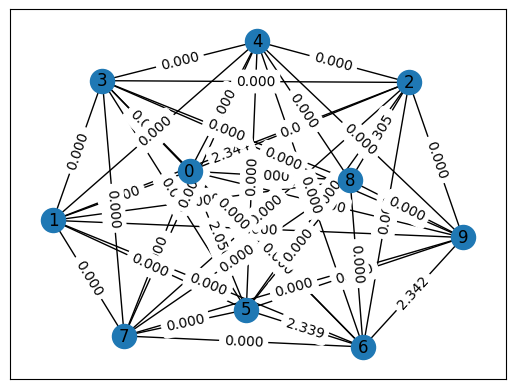

Iteration 10:
Pheromone (0, 1): 0.000
Pheromone (0, 2): 0.000
Pheromone (0, 3): 0.000
Pheromone (0, 4): 0.000
Pheromone (0, 5): 2.056
Pheromone (0, 6): 0.000
Pheromone (0, 7): 0.000
Pheromone (0, 8): 0.000
Pheromone (0, 9): 0.000
Pheromone (1, 2): 2.344
Pheromone (1, 3): 0.000
Pheromone (1, 4): 0.000
Pheromone (1, 5): 0.000
Pheromone (1, 6): 0.000
Pheromone (1, 7): 0.000
Pheromone (1, 8): 0.000
Pheromone (1, 9): 0.000
Pheromone (2, 3): 0.000
Pheromone (2, 4): 0.000
Pheromone (2, 5): 0.000
Pheromone (2, 6): 0.000
Pheromone (2, 7): 0.000
Pheromone (2, 8): 2.305
Pheromone (2, 9): 0.000
Pheromone (3, 4): 0.000
Pheromone (3, 5): 0.000
Pheromone (3, 6): 0.000
Pheromone (3, 7): 0.000
Pheromone (3, 8): 0.000
Pheromone (3, 9): 0.000
Pheromone (4, 5): 0.000
Pheromone (4, 6): 0.000
Pheromone (4, 7): 0.000
Pheromone (4, 8): 0.000
Pheromone (4, 9): 0.000
Pheromone (5, 6): 2.339
Pheromone (5, 7): 0.000
Pheromone (5, 8): 0.000
Pheromone (5, 9): 0.000
Pheromone (6, 7): 0.000
Pheromone (6, 8): 0.000
Ph

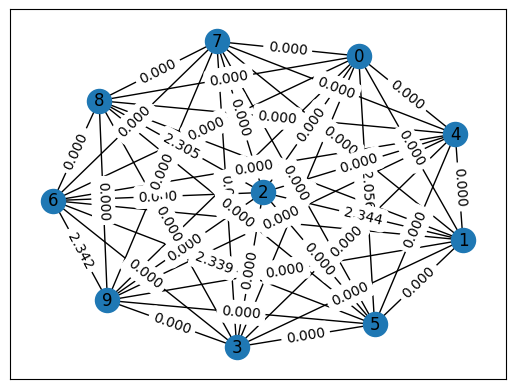

Iteration 20:
Pheromone (0, 1): 0.000
Pheromone (0, 2): 0.000
Pheromone (0, 3): 0.000
Pheromone (0, 4): 0.000
Pheromone (0, 5): 2.056
Pheromone (0, 6): 0.000
Pheromone (0, 7): 0.000
Pheromone (0, 8): 0.000
Pheromone (0, 9): 0.000
Pheromone (1, 2): 2.344
Pheromone (1, 3): 0.000
Pheromone (1, 4): 0.000
Pheromone (1, 5): 0.000
Pheromone (1, 6): 0.000
Pheromone (1, 7): 0.000
Pheromone (1, 8): 0.000
Pheromone (1, 9): 0.000
Pheromone (2, 3): 0.000
Pheromone (2, 4): 0.000
Pheromone (2, 5): 0.000
Pheromone (2, 6): 0.000
Pheromone (2, 7): 0.000
Pheromone (2, 8): 2.305
Pheromone (2, 9): 0.000
Pheromone (3, 4): 0.000
Pheromone (3, 5): 0.000
Pheromone (3, 6): 0.000
Pheromone (3, 7): 0.000
Pheromone (3, 8): 0.000
Pheromone (3, 9): 0.000
Pheromone (4, 5): 0.000
Pheromone (4, 6): 0.000
Pheromone (4, 7): 0.000
Pheromone (4, 8): 0.000
Pheromone (4, 9): 0.000
Pheromone (5, 6): 2.339
Pheromone (5, 7): 0.000
Pheromone (5, 8): 0.000
Pheromone (5, 9): 0.000
Pheromone (6, 7): 0.000
Pheromone (6, 8): 0.000
Ph

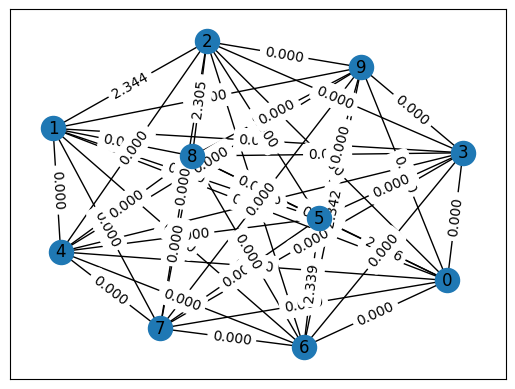

Iteration 30:
Pheromone (0, 1): 0.000
Pheromone (0, 2): 0.000
Pheromone (0, 3): 0.000
Pheromone (0, 4): 0.000
Pheromone (0, 5): 2.056
Pheromone (0, 6): 0.000
Pheromone (0, 7): 0.000
Pheromone (0, 8): 0.000
Pheromone (0, 9): 0.000
Pheromone (1, 2): 2.344
Pheromone (1, 3): 0.000
Pheromone (1, 4): 0.000
Pheromone (1, 5): 0.000
Pheromone (1, 6): 0.000
Pheromone (1, 7): 0.000
Pheromone (1, 8): 0.000
Pheromone (1, 9): 0.000
Pheromone (2, 3): 0.000
Pheromone (2, 4): 0.000
Pheromone (2, 5): 0.000
Pheromone (2, 6): 0.000
Pheromone (2, 7): 0.000
Pheromone (2, 8): 2.305
Pheromone (2, 9): 0.000
Pheromone (3, 4): 0.000
Pheromone (3, 5): 0.000
Pheromone (3, 6): 0.000
Pheromone (3, 7): 0.000
Pheromone (3, 8): 0.000
Pheromone (3, 9): 0.000
Pheromone (4, 5): 0.000
Pheromone (4, 6): 0.000
Pheromone (4, 7): 0.000
Pheromone (4, 8): 0.000
Pheromone (4, 9): 0.000
Pheromone (5, 6): 2.339
Pheromone (5, 7): 0.000
Pheromone (5, 8): 0.000
Pheromone (5, 9): 0.000
Pheromone (6, 7): 0.000
Pheromone (6, 8): 0.000
Ph

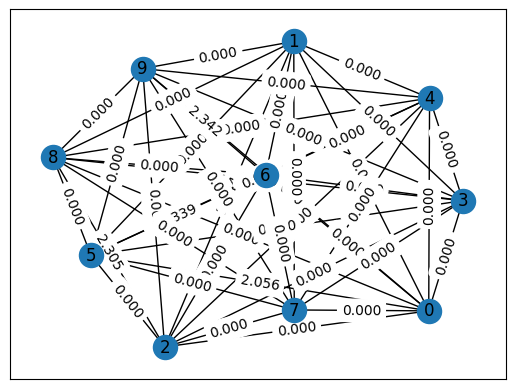

Iteration 40:
Pheromone (0, 1): 0.000
Pheromone (0, 2): 0.000
Pheromone (0, 3): 0.000
Pheromone (0, 4): 0.000
Pheromone (0, 5): 2.056
Pheromone (0, 6): 0.000
Pheromone (0, 7): 0.000
Pheromone (0, 8): 0.000
Pheromone (0, 9): 0.000
Pheromone (1, 2): 2.344
Pheromone (1, 3): 0.000
Pheromone (1, 4): 0.000
Pheromone (1, 5): 0.000
Pheromone (1, 6): 0.000
Pheromone (1, 7): 0.000
Pheromone (1, 8): 0.000
Pheromone (1, 9): 0.000
Pheromone (2, 3): 0.000
Pheromone (2, 4): 0.000
Pheromone (2, 5): 0.000
Pheromone (2, 6): 0.000
Pheromone (2, 7): 0.000
Pheromone (2, 8): 2.305
Pheromone (2, 9): 0.000
Pheromone (3, 4): 0.000
Pheromone (3, 5): 0.000
Pheromone (3, 6): 0.000
Pheromone (3, 7): 0.000
Pheromone (3, 8): 0.000
Pheromone (3, 9): 0.000
Pheromone (4, 5): 0.000
Pheromone (4, 6): 0.000
Pheromone (4, 7): 0.000
Pheromone (4, 8): 0.000
Pheromone (4, 9): 0.000
Pheromone (5, 6): 2.339
Pheromone (5, 7): 0.000
Pheromone (5, 8): 0.000
Pheromone (5, 9): 0.000
Pheromone (6, 7): 0.000
Pheromone (6, 8): 0.000
Ph

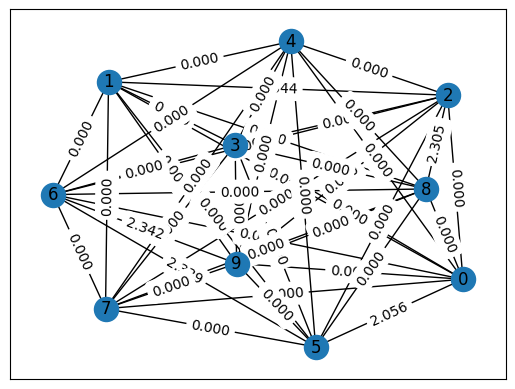

Iteration 50:
Pheromone (0, 1): 0.000
Pheromone (0, 2): 0.000
Pheromone (0, 3): 0.000
Pheromone (0, 4): 0.000
Pheromone (0, 5): 2.056
Pheromone (0, 6): 0.000
Pheromone (0, 7): 0.000
Pheromone (0, 8): 0.000
Pheromone (0, 9): 0.000
Pheromone (1, 2): 2.344
Pheromone (1, 3): 0.000
Pheromone (1, 4): 0.000
Pheromone (1, 5): 0.000
Pheromone (1, 6): 0.000
Pheromone (1, 7): 0.000
Pheromone (1, 8): 0.000
Pheromone (1, 9): 0.000
Pheromone (2, 3): 0.000
Pheromone (2, 4): 0.000
Pheromone (2, 5): 0.000
Pheromone (2, 6): 0.000
Pheromone (2, 7): 0.000
Pheromone (2, 8): 2.305
Pheromone (2, 9): 0.000
Pheromone (3, 4): 0.000
Pheromone (3, 5): 0.000
Pheromone (3, 6): 0.000
Pheromone (3, 7): 0.000
Pheromone (3, 8): 0.000
Pheromone (3, 9): 0.000
Pheromone (4, 5): 0.000
Pheromone (4, 6): 0.000
Pheromone (4, 7): 0.000
Pheromone (4, 8): 0.000
Pheromone (4, 9): 0.000
Pheromone (5, 6): 2.339
Pheromone (5, 7): 0.000
Pheromone (5, 8): 0.000
Pheromone (5, 9): 0.000
Pheromone (6, 7): 0.000
Pheromone (6, 8): 0.000
Ph

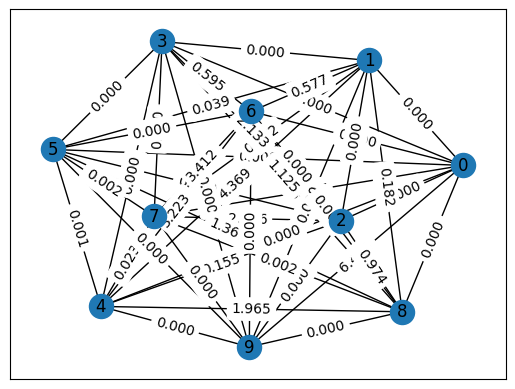

Iteration 10:
Pheromone (0, 1): 0.000
Pheromone (0, 2): 0.000
Pheromone (0, 3): 0.000
Pheromone (0, 4): 0.000
Pheromone (0, 5): 0.000
Pheromone (0, 6): 0.000
Pheromone (0, 7): 0.057
Pheromone (0, 8): 0.000
Pheromone (0, 9): 6.446
Pheromone (1, 2): 0.000
Pheromone (1, 3): 0.000
Pheromone (1, 4): 4.369
Pheromone (1, 5): 0.039
Pheromone (1, 6): 0.577
Pheromone (1, 7): 0.572
Pheromone (1, 8): 0.182
Pheromone (1, 9): 0.000
Pheromone (2, 3): 2.133
Pheromone (2, 4): 0.155
Pheromone (2, 5): 0.000
Pheromone (2, 6): 0.000
Pheromone (2, 7): 2.266
Pheromone (2, 8): 0.974
Pheromone (2, 9): 0.000
Pheromone (3, 4): 0.000
Pheromone (3, 5): 0.000
Pheromone (3, 6): 0.595
Pheromone (3, 7): 0.000
Pheromone (3, 8): 1.125
Pheromone (3, 9): 0.000
Pheromone (4, 5): 0.001
Pheromone (4, 6): 3.223
Pheromone (4, 7): 0.023
Pheromone (4, 8): 1.965
Pheromone (4, 9): 0.000
Pheromone (5, 6): 0.000
Pheromone (5, 7): 0.002
Pheromone (5, 8): 1.367
Pheromone (5, 9): 0.000
Pheromone (6, 7): 3.412
Pheromone (6, 8): 0.001
Ph

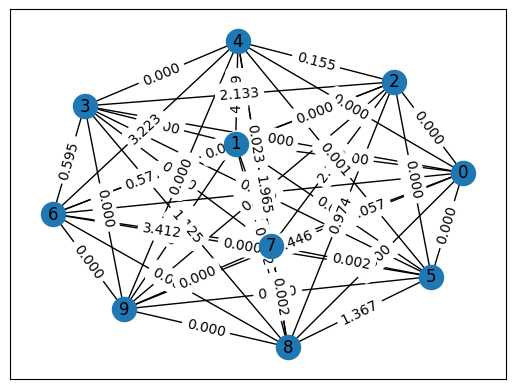

Iteration 20:
Pheromone (0, 1): 0.000
Pheromone (0, 2): 0.000
Pheromone (0, 3): 0.000
Pheromone (0, 4): 0.000
Pheromone (0, 5): 0.000
Pheromone (0, 6): 0.000
Pheromone (0, 7): 0.057
Pheromone (0, 8): 0.000
Pheromone (0, 9): 6.446
Pheromone (1, 2): 0.000
Pheromone (1, 3): 0.000
Pheromone (1, 4): 4.369
Pheromone (1, 5): 0.039
Pheromone (1, 6): 0.577
Pheromone (1, 7): 0.572
Pheromone (1, 8): 0.182
Pheromone (1, 9): 0.000
Pheromone (2, 3): 2.133
Pheromone (2, 4): 0.155
Pheromone (2, 5): 0.000
Pheromone (2, 6): 0.000
Pheromone (2, 7): 2.266
Pheromone (2, 8): 0.974
Pheromone (2, 9): 0.000
Pheromone (3, 4): 0.000
Pheromone (3, 5): 0.000
Pheromone (3, 6): 0.595
Pheromone (3, 7): 0.000
Pheromone (3, 8): 1.125
Pheromone (3, 9): 0.000
Pheromone (4, 5): 0.001
Pheromone (4, 6): 3.223
Pheromone (4, 7): 0.023
Pheromone (4, 8): 1.965
Pheromone (4, 9): 0.000
Pheromone (5, 6): 0.000
Pheromone (5, 7): 0.002
Pheromone (5, 8): 1.367
Pheromone (5, 9): 0.000
Pheromone (6, 7): 3.412
Pheromone (6, 8): 0.001
Ph

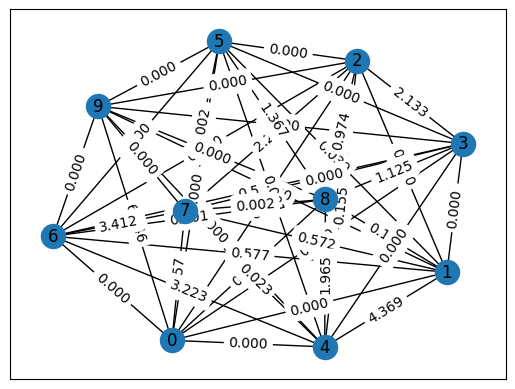

Iteration 30:
Pheromone (0, 1): 0.000
Pheromone (0, 2): 0.000
Pheromone (0, 3): 0.000
Pheromone (0, 4): 0.000
Pheromone (0, 5): 0.000
Pheromone (0, 6): 0.000
Pheromone (0, 7): 0.057
Pheromone (0, 8): 0.000
Pheromone (0, 9): 6.446
Pheromone (1, 2): 0.000
Pheromone (1, 3): 0.000
Pheromone (1, 4): 4.369
Pheromone (1, 5): 0.039
Pheromone (1, 6): 0.577
Pheromone (1, 7): 0.572
Pheromone (1, 8): 0.182
Pheromone (1, 9): 0.000
Pheromone (2, 3): 2.133
Pheromone (2, 4): 0.155
Pheromone (2, 5): 0.000
Pheromone (2, 6): 0.000
Pheromone (2, 7): 2.266
Pheromone (2, 8): 0.974
Pheromone (2, 9): 0.000
Pheromone (3, 4): 0.000
Pheromone (3, 5): 0.000
Pheromone (3, 6): 0.595
Pheromone (3, 7): 0.000
Pheromone (3, 8): 1.125
Pheromone (3, 9): 0.000
Pheromone (4, 5): 0.001
Pheromone (4, 6): 3.223
Pheromone (4, 7): 0.023
Pheromone (4, 8): 1.965
Pheromone (4, 9): 0.000
Pheromone (5, 6): 0.000
Pheromone (5, 7): 0.002
Pheromone (5, 8): 1.367
Pheromone (5, 9): 0.000
Pheromone (6, 7): 3.412
Pheromone (6, 8): 0.001
Ph

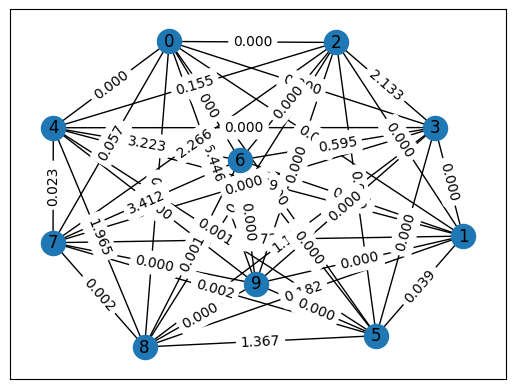

Iteration 40:
Pheromone (0, 1): 0.000
Pheromone (0, 2): 0.000
Pheromone (0, 3): 0.000
Pheromone (0, 4): 0.000
Pheromone (0, 5): 0.000
Pheromone (0, 6): 0.000
Pheromone (0, 7): 0.057
Pheromone (0, 8): 0.000
Pheromone (0, 9): 6.446
Pheromone (1, 2): 0.000
Pheromone (1, 3): 0.000
Pheromone (1, 4): 4.369
Pheromone (1, 5): 0.039
Pheromone (1, 6): 0.577
Pheromone (1, 7): 0.572
Pheromone (1, 8): 0.182
Pheromone (1, 9): 0.000
Pheromone (2, 3): 2.133
Pheromone (2, 4): 0.155
Pheromone (2, 5): 0.000
Pheromone (2, 6): 0.000
Pheromone (2, 7): 2.266
Pheromone (2, 8): 0.974
Pheromone (2, 9): 0.000
Pheromone (3, 4): 0.000
Pheromone (3, 5): 0.000
Pheromone (3, 6): 0.595
Pheromone (3, 7): 0.000
Pheromone (3, 8): 1.125
Pheromone (3, 9): 0.000
Pheromone (4, 5): 0.001
Pheromone (4, 6): 3.223
Pheromone (4, 7): 0.023
Pheromone (4, 8): 1.965
Pheromone (4, 9): 0.000
Pheromone (5, 6): 0.000
Pheromone (5, 7): 0.002
Pheromone (5, 8): 1.367
Pheromone (5, 9): 0.000
Pheromone (6, 7): 3.412
Pheromone (6, 8): 0.001
Ph

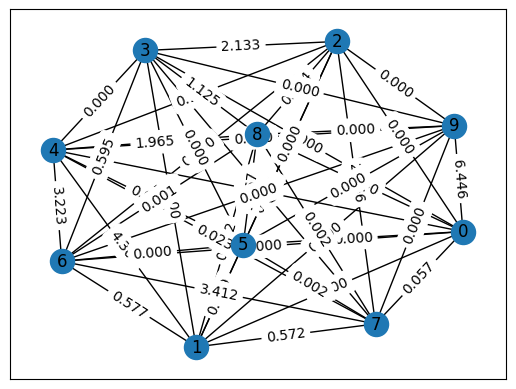

Iteration 50:
Pheromone (0, 1): 0.000
Pheromone (0, 2): 0.000
Pheromone (0, 3): 0.000
Pheromone (0, 4): 0.000
Pheromone (0, 5): 0.000
Pheromone (0, 6): 0.000
Pheromone (0, 7): 0.057
Pheromone (0, 8): 0.000
Pheromone (0, 9): 6.446
Pheromone (1, 2): 0.000
Pheromone (1, 3): 0.000
Pheromone (1, 4): 4.369
Pheromone (1, 5): 0.039
Pheromone (1, 6): 0.577
Pheromone (1, 7): 0.572
Pheromone (1, 8): 0.182
Pheromone (1, 9): 0.000
Pheromone (2, 3): 2.133
Pheromone (2, 4): 0.155
Pheromone (2, 5): 0.000
Pheromone (2, 6): 0.000
Pheromone (2, 7): 2.266
Pheromone (2, 8): 0.974
Pheromone (2, 9): 0.000
Pheromone (3, 4): 0.000
Pheromone (3, 5): 0.000
Pheromone (3, 6): 0.595
Pheromone (3, 7): 0.000
Pheromone (3, 8): 1.125
Pheromone (3, 9): 0.000
Pheromone (4, 5): 0.001
Pheromone (4, 6): 3.223
Pheromone (4, 7): 0.023
Pheromone (4, 8): 1.965
Pheromone (4, 9): 0.000
Pheromone (5, 6): 0.000
Pheromone (5, 7): 0.002
Pheromone (5, 8): 1.367
Pheromone (5, 9): 0.000
Pheromone (6, 7): 3.412
Pheromone (6, 8): 0.001
Ph

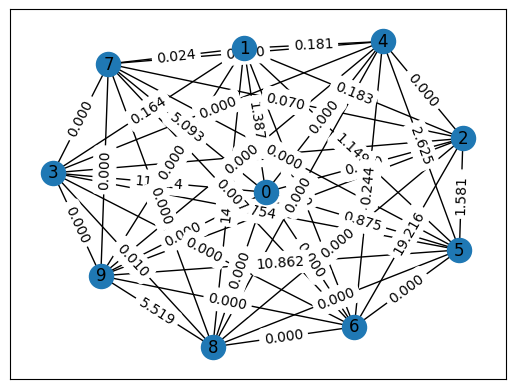

Iteration 10:
Pheromone (0, 1): 1.387
Pheromone (0, 2): 0.000
Pheromone (0, 3): 11.714
Pheromone (0, 4): 0.000
Pheromone (0, 5): 0.875
Pheromone (0, 6): 0.000
Pheromone (0, 7): 5.093
Pheromone (0, 8): 0.000
Pheromone (0, 9): 0.000
Pheromone (1, 2): 0.183
Pheromone (1, 3): 0.164
Pheromone (1, 4): 0.181
Pheromone (1, 5): 1.149
Pheromone (1, 6): 0.000
Pheromone (1, 7): 0.024
Pheromone (1, 8): 14.249
Pheromone (1, 9): 0.000
Pheromone (2, 3): 0.028
Pheromone (2, 4): 0.000
Pheromone (2, 5): 1.581
Pheromone (2, 6): 19.216
Pheromone (2, 7): 0.070
Pheromone (2, 8): 0.000
Pheromone (2, 9): 0.000
Pheromone (3, 4): 0.000
Pheromone (3, 5): 1.754
Pheromone (3, 6): 0.000
Pheromone (3, 7): 0.000
Pheromone (3, 8): 0.010
Pheromone (3, 9): 0.000
Pheromone (4, 5): 2.625
Pheromone (4, 6): 0.244
Pheromone (4, 7): 0.000
Pheromone (4, 8): 0.000
Pheromone (4, 9): 0.000
Pheromone (5, 6): 0.000
Pheromone (5, 7): 0.000
Pheromone (5, 8): 0.000
Pheromone (5, 9): 10.862
Pheromone (6, 7): 0.007
Pheromone (6, 8): 0.00

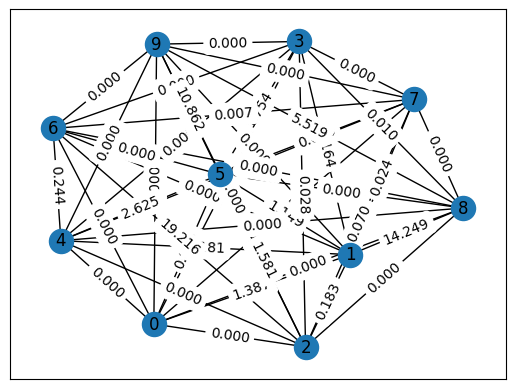

Iteration 20:
Pheromone (0, 1): 1.387
Pheromone (0, 2): 0.000
Pheromone (0, 3): 11.714
Pheromone (0, 4): 0.000
Pheromone (0, 5): 0.875
Pheromone (0, 6): 0.000
Pheromone (0, 7): 5.093
Pheromone (0, 8): 0.000
Pheromone (0, 9): 0.000
Pheromone (1, 2): 0.183
Pheromone (1, 3): 0.164
Pheromone (1, 4): 0.181
Pheromone (1, 5): 1.149
Pheromone (1, 6): 0.000
Pheromone (1, 7): 0.024
Pheromone (1, 8): 14.249
Pheromone (1, 9): 0.000
Pheromone (2, 3): 0.028
Pheromone (2, 4): 0.000
Pheromone (2, 5): 1.581
Pheromone (2, 6): 19.216
Pheromone (2, 7): 0.070
Pheromone (2, 8): 0.000
Pheromone (2, 9): 0.000
Pheromone (3, 4): 0.000
Pheromone (3, 5): 1.754
Pheromone (3, 6): 0.000
Pheromone (3, 7): 0.000
Pheromone (3, 8): 0.010
Pheromone (3, 9): 0.000
Pheromone (4, 5): 2.625
Pheromone (4, 6): 0.244
Pheromone (4, 7): 0.000
Pheromone (4, 8): 0.000
Pheromone (4, 9): 0.000
Pheromone (5, 6): 0.000
Pheromone (5, 7): 0.000
Pheromone (5, 8): 0.000
Pheromone (5, 9): 10.862
Pheromone (6, 7): 0.007
Pheromone (6, 8): 0.00

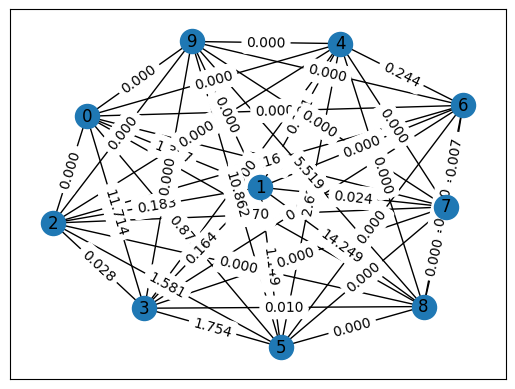

Iteration 30:
Pheromone (0, 1): 1.387
Pheromone (0, 2): 0.000
Pheromone (0, 3): 11.714
Pheromone (0, 4): 0.000
Pheromone (0, 5): 0.875
Pheromone (0, 6): 0.000
Pheromone (0, 7): 5.093
Pheromone (0, 8): 0.000
Pheromone (0, 9): 0.000
Pheromone (1, 2): 0.183
Pheromone (1, 3): 0.164
Pheromone (1, 4): 0.181
Pheromone (1, 5): 1.149
Pheromone (1, 6): 0.000
Pheromone (1, 7): 0.024
Pheromone (1, 8): 14.249
Pheromone (1, 9): 0.000
Pheromone (2, 3): 0.028
Pheromone (2, 4): 0.000
Pheromone (2, 5): 1.581
Pheromone (2, 6): 19.216
Pheromone (2, 7): 0.070
Pheromone (2, 8): 0.000
Pheromone (2, 9): 0.000
Pheromone (3, 4): 0.000
Pheromone (3, 5): 1.754
Pheromone (3, 6): 0.000
Pheromone (3, 7): 0.000
Pheromone (3, 8): 0.010
Pheromone (3, 9): 0.000
Pheromone (4, 5): 2.625
Pheromone (4, 6): 0.244
Pheromone (4, 7): 0.000
Pheromone (4, 8): 0.000
Pheromone (4, 9): 0.000
Pheromone (5, 6): 0.000
Pheromone (5, 7): 0.000
Pheromone (5, 8): 0.000
Pheromone (5, 9): 10.862
Pheromone (6, 7): 0.007
Pheromone (6, 8): 0.00

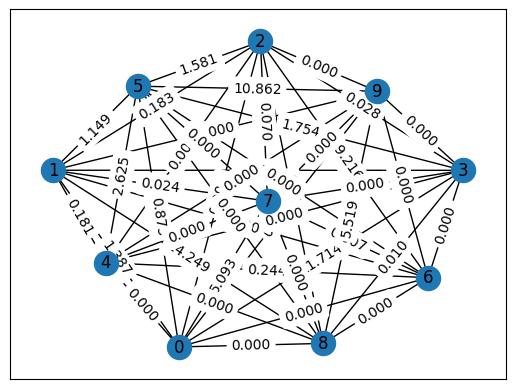

Iteration 40:
Pheromone (0, 1): 1.387
Pheromone (0, 2): 0.000
Pheromone (0, 3): 11.714
Pheromone (0, 4): 0.000
Pheromone (0, 5): 0.875
Pheromone (0, 6): 0.000
Pheromone (0, 7): 5.093
Pheromone (0, 8): 0.000
Pheromone (0, 9): 0.000
Pheromone (1, 2): 0.183
Pheromone (1, 3): 0.164
Pheromone (1, 4): 0.181
Pheromone (1, 5): 1.149
Pheromone (1, 6): 0.000
Pheromone (1, 7): 0.024
Pheromone (1, 8): 14.249
Pheromone (1, 9): 0.000
Pheromone (2, 3): 0.028
Pheromone (2, 4): 0.000
Pheromone (2, 5): 1.581
Pheromone (2, 6): 19.216
Pheromone (2, 7): 0.070
Pheromone (2, 8): 0.000
Pheromone (2, 9): 0.000
Pheromone (3, 4): 0.000
Pheromone (3, 5): 1.754
Pheromone (3, 6): 0.000
Pheromone (3, 7): 0.000
Pheromone (3, 8): 0.010
Pheromone (3, 9): 0.000
Pheromone (4, 5): 2.625
Pheromone (4, 6): 0.244
Pheromone (4, 7): 0.000
Pheromone (4, 8): 0.000
Pheromone (4, 9): 0.000
Pheromone (5, 6): 0.000
Pheromone (5, 7): 0.000
Pheromone (5, 8): 0.000
Pheromone (5, 9): 10.862
Pheromone (6, 7): 0.007
Pheromone (6, 8): 0.00

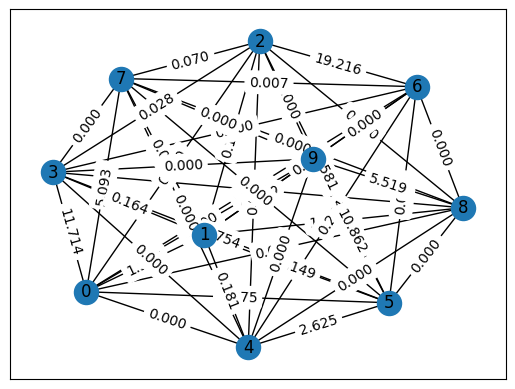

Iteration 50:
Pheromone (0, 1): 1.387
Pheromone (0, 2): 0.000
Pheromone (0, 3): 11.714
Pheromone (0, 4): 0.000
Pheromone (0, 5): 0.875
Pheromone (0, 6): 0.000
Pheromone (0, 7): 5.093
Pheromone (0, 8): 0.000
Pheromone (0, 9): 0.000
Pheromone (1, 2): 0.183
Pheromone (1, 3): 0.164
Pheromone (1, 4): 0.181
Pheromone (1, 5): 1.149
Pheromone (1, 6): 0.000
Pheromone (1, 7): 0.024
Pheromone (1, 8): 14.249
Pheromone (1, 9): 0.000
Pheromone (2, 3): 0.028
Pheromone (2, 4): 0.000
Pheromone (2, 5): 1.581
Pheromone (2, 6): 19.216
Pheromone (2, 7): 0.070
Pheromone (2, 8): 0.000
Pheromone (2, 9): 0.000
Pheromone (3, 4): 0.000
Pheromone (3, 5): 1.754
Pheromone (3, 6): 0.000
Pheromone (3, 7): 0.000
Pheromone (3, 8): 0.010
Pheromone (3, 9): 0.000
Pheromone (4, 5): 2.625
Pheromone (4, 6): 0.244
Pheromone (4, 7): 0.000
Pheromone (4, 8): 0.000
Pheromone (4, 9): 0.000
Pheromone (5, 6): 0.000
Pheromone (5, 7): 0.000
Pheromone (5, 8): 0.000
Pheromone (5, 9): 10.862
Pheromone (6, 7): 0.007
Pheromone (6, 8): 0.00

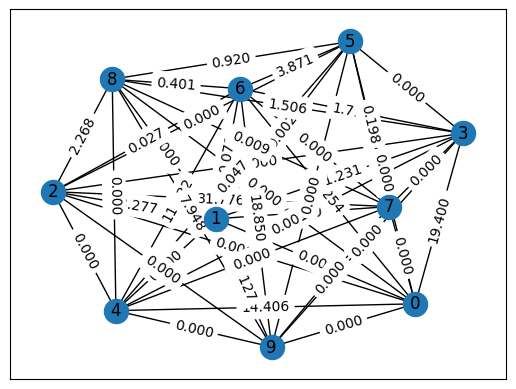

Iteration 10:
Pheromone (0, 1): 0.009
Pheromone (0, 2): 0.000
Pheromone (0, 3): 19.400
Pheromone (0, 4): 14.406
Pheromone (0, 5): 0.000
Pheromone (0, 6): 0.254
Pheromone (0, 7): 0.000
Pheromone (0, 8): 0.000
Pheromone (0, 9): 0.000
Pheromone (1, 2): 13.277
Pheromone (1, 3): 11.231
Pheromone (1, 4): 0.000
Pheromone (1, 5): 0.002
Pheromone (1, 6): 0.071
Pheromone (1, 7): 0.000
Pheromone (1, 8): 0.000
Pheromone (1, 9): 7.127
Pheromone (2, 3): 0.000
Pheromone (2, 4): 0.000
Pheromone (2, 5): 0.000
Pheromone (2, 6): 0.027
Pheromone (2, 7): 31.776
Pheromone (2, 8): 2.268
Pheromone (2, 9): 0.000
Pheromone (3, 4): 0.001
Pheromone (3, 5): 0.000
Pheromone (3, 6): 1.713
Pheromone (3, 7): 0.000
Pheromone (3, 8): 1.506
Pheromone (3, 9): 0.000
Pheromone (4, 5): 0.047
Pheromone (4, 6): 11.932
Pheromone (4, 7): 0.000
Pheromone (4, 8): 0.000
Pheromone (4, 9): 0.000
Pheromone (5, 6): 3.871
Pheromone (5, 7): 0.198
Pheromone (5, 8): 0.920
Pheromone (5, 9): 0.000
Pheromone (6, 7): 0.000
Pheromone (6, 8): 0.

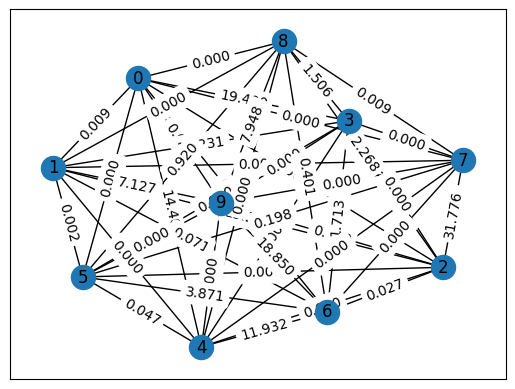

Iteration 20:
Pheromone (0, 1): 0.009
Pheromone (0, 2): 0.000
Pheromone (0, 3): 19.400
Pheromone (0, 4): 14.406
Pheromone (0, 5): 0.000
Pheromone (0, 6): 0.254
Pheromone (0, 7): 0.000
Pheromone (0, 8): 0.000
Pheromone (0, 9): 0.000
Pheromone (1, 2): 13.277
Pheromone (1, 3): 11.231
Pheromone (1, 4): 0.000
Pheromone (1, 5): 0.002
Pheromone (1, 6): 0.071
Pheromone (1, 7): 0.000
Pheromone (1, 8): 0.000
Pheromone (1, 9): 7.127
Pheromone (2, 3): 0.000
Pheromone (2, 4): 0.000
Pheromone (2, 5): 0.000
Pheromone (2, 6): 0.027
Pheromone (2, 7): 31.776
Pheromone (2, 8): 2.268
Pheromone (2, 9): 0.000
Pheromone (3, 4): 0.001
Pheromone (3, 5): 0.000
Pheromone (3, 6): 1.713
Pheromone (3, 7): 0.000
Pheromone (3, 8): 1.506
Pheromone (3, 9): 0.000
Pheromone (4, 5): 0.047
Pheromone (4, 6): 11.932
Pheromone (4, 7): 0.000
Pheromone (4, 8): 0.000
Pheromone (4, 9): 0.000
Pheromone (5, 6): 3.871
Pheromone (5, 7): 0.198
Pheromone (5, 8): 0.920
Pheromone (5, 9): 0.000
Pheromone (6, 7): 0.000
Pheromone (6, 8): 0.

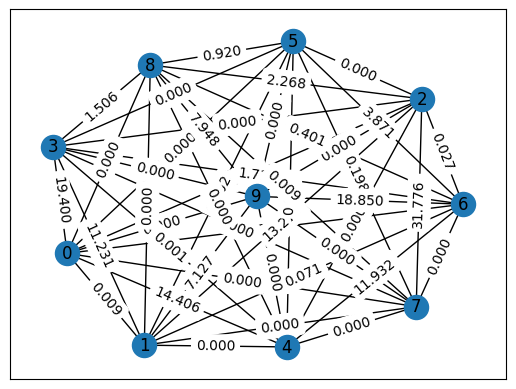

Iteration 30:
Pheromone (0, 1): 0.009
Pheromone (0, 2): 0.000
Pheromone (0, 3): 19.400
Pheromone (0, 4): 14.406
Pheromone (0, 5): 0.000
Pheromone (0, 6): 0.254
Pheromone (0, 7): 0.000
Pheromone (0, 8): 0.000
Pheromone (0, 9): 0.000
Pheromone (1, 2): 13.277
Pheromone (1, 3): 11.231
Pheromone (1, 4): 0.000
Pheromone (1, 5): 0.002
Pheromone (1, 6): 0.071
Pheromone (1, 7): 0.000
Pheromone (1, 8): 0.000
Pheromone (1, 9): 7.127
Pheromone (2, 3): 0.000
Pheromone (2, 4): 0.000
Pheromone (2, 5): 0.000
Pheromone (2, 6): 0.027
Pheromone (2, 7): 31.776
Pheromone (2, 8): 2.268
Pheromone (2, 9): 0.000
Pheromone (3, 4): 0.001
Pheromone (3, 5): 0.000
Pheromone (3, 6): 1.713
Pheromone (3, 7): 0.000
Pheromone (3, 8): 1.506
Pheromone (3, 9): 0.000
Pheromone (4, 5): 0.047
Pheromone (4, 6): 11.932
Pheromone (4, 7): 0.000
Pheromone (4, 8): 0.000
Pheromone (4, 9): 0.000
Pheromone (5, 6): 3.871
Pheromone (5, 7): 0.198
Pheromone (5, 8): 0.920
Pheromone (5, 9): 0.000
Pheromone (6, 7): 0.000
Pheromone (6, 8): 0.

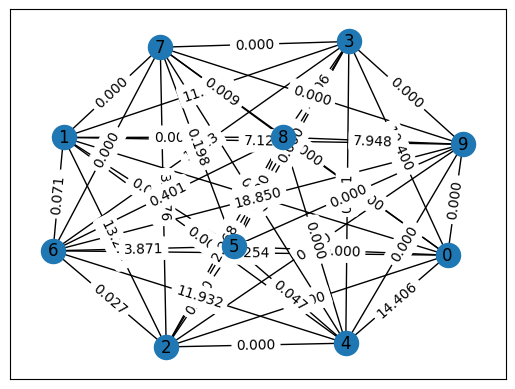

Iteration 40:
Pheromone (0, 1): 0.009
Pheromone (0, 2): 0.000
Pheromone (0, 3): 19.400
Pheromone (0, 4): 14.406
Pheromone (0, 5): 0.000
Pheromone (0, 6): 0.254
Pheromone (0, 7): 0.000
Pheromone (0, 8): 0.000
Pheromone (0, 9): 0.000
Pheromone (1, 2): 13.277
Pheromone (1, 3): 11.231
Pheromone (1, 4): 0.000
Pheromone (1, 5): 0.002
Pheromone (1, 6): 0.071
Pheromone (1, 7): 0.000
Pheromone (1, 8): 0.000
Pheromone (1, 9): 7.127
Pheromone (2, 3): 0.000
Pheromone (2, 4): 0.000
Pheromone (2, 5): 0.000
Pheromone (2, 6): 0.027
Pheromone (2, 7): 31.776
Pheromone (2, 8): 2.268
Pheromone (2, 9): 0.000
Pheromone (3, 4): 0.001
Pheromone (3, 5): 0.000
Pheromone (3, 6): 1.713
Pheromone (3, 7): 0.000
Pheromone (3, 8): 1.506
Pheromone (3, 9): 0.000
Pheromone (4, 5): 0.047
Pheromone (4, 6): 11.932
Pheromone (4, 7): 0.000
Pheromone (4, 8): 0.000
Pheromone (4, 9): 0.000
Pheromone (5, 6): 3.871
Pheromone (5, 7): 0.198
Pheromone (5, 8): 0.920
Pheromone (5, 9): 0.000
Pheromone (6, 7): 0.000
Pheromone (6, 8): 0.

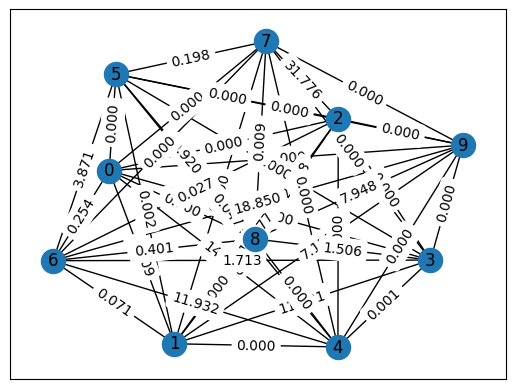

Iteration 50:
Pheromone (0, 1): 0.009
Pheromone (0, 2): 0.000
Pheromone (0, 3): 19.400
Pheromone (0, 4): 14.406
Pheromone (0, 5): 0.000
Pheromone (0, 6): 0.254
Pheromone (0, 7): 0.000
Pheromone (0, 8): 0.000
Pheromone (0, 9): 0.000
Pheromone (1, 2): 13.277
Pheromone (1, 3): 11.231
Pheromone (1, 4): 0.000
Pheromone (1, 5): 0.002
Pheromone (1, 6): 0.071
Pheromone (1, 7): 0.000
Pheromone (1, 8): 0.000
Pheromone (1, 9): 7.127
Pheromone (2, 3): 0.000
Pheromone (2, 4): 0.000
Pheromone (2, 5): 0.000
Pheromone (2, 6): 0.027
Pheromone (2, 7): 31.776
Pheromone (2, 8): 2.268
Pheromone (2, 9): 0.000
Pheromone (3, 4): 0.001
Pheromone (3, 5): 0.000
Pheromone (3, 6): 1.713
Pheromone (3, 7): 0.000
Pheromone (3, 8): 1.506
Pheromone (3, 9): 0.000
Pheromone (4, 5): 0.047
Pheromone (4, 6): 11.932
Pheromone (4, 7): 0.000
Pheromone (4, 8): 0.000
Pheromone (4, 9): 0.000
Pheromone (5, 6): 3.871
Pheromone (5, 7): 0.198
Pheromone (5, 8): 0.920
Pheromone (5, 9): 0.000
Pheromone (6, 7): 0.000
Pheromone (6, 8): 0.

In [59]:
# Main code
num_cities = 10
num_ants_list = [1, 5, 10, 20]
num_iterations = 50
alpha = 1.0
beta = 2.0
rho = 0.5
q = 100.0

for num_ants in num_ants_list:
    distance_matrix = generate_distance_matrix(num_cities)
    aco = ACO(num_ants, num_iterations, alpha, beta, rho, q)
    best_tour, best_distance = aco.run(distance_matrix)

    if num_iterations >= 10:
        for iteration in range(10, num_iterations + 1, 10):
            aco.visualize_pheromone_map(aco.pheromone_matrix, num_cities)
            print(f"Iteration {iteration}:")
            aco.print_pheromone_map(aco.pheromone_matrix, num_cities)
            print(f"Optimal Path: {best_tour}")
            print()

In [60]:
print(f"Number of cites: 10")
for num_ants in num_ants_list:
    distance_matrix = generate_distance_matrix(num_cities)
    aco = ACO(num_ants, num_iterations, alpha, beta, rho, q)
    best_tour, best_distance = aco.run(distance_matrix)

    print(f"Number of ants: {num_ants}")
    print(f"Best tour: {best_tour}")
    print(f"Best distance: {best_distance}")
    print()


Number of cites: 10
Number of ants: 1
Best tour: [7, 1, 2, 9, 3, 0, 5, 4, 6, 8]
Best distance: 69.76529654180418

Number of ants: 5
Best tour: [5, 7, 4, 8, 1, 3, 6, 9, 0, 2]
Best distance: 112.10362662598622

Number of ants: 10
Best tour: [8, 1, 5, 2, 0, 3, 7, 6, 4, 9]
Best distance: 108.65436877955688

Number of ants: 20
Best tour: [7, 0, 8, 6, 2, 5, 1, 4, 3, 9]
Best distance: 62.29602519835858



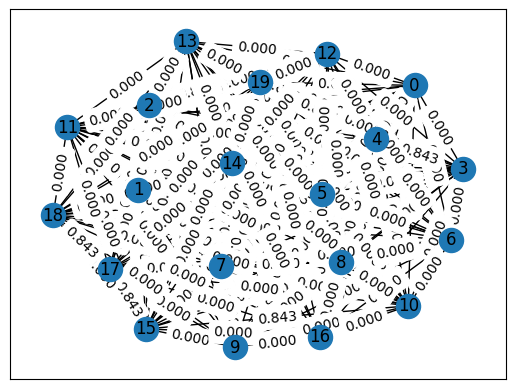

Iteration 10:
Pheromone (0, 1): 0.000
Pheromone (0, 2): 0.000
Pheromone (0, 3): 0.000
Pheromone (0, 4): 0.000
Pheromone (0, 5): 0.000
Pheromone (0, 6): 0.000
Pheromone (0, 7): 0.000
Pheromone (0, 8): 0.000
Pheromone (0, 9): 0.000
Pheromone (0, 10): 0.830
Pheromone (0, 11): 0.000
Pheromone (0, 12): 0.000
Pheromone (0, 13): 0.000
Pheromone (0, 14): 0.000
Pheromone (0, 15): 0.000
Pheromone (0, 16): 0.000
Pheromone (0, 17): 0.000
Pheromone (0, 18): 0.000
Pheromone (0, 19): 0.000
Pheromone (1, 2): 0.000
Pheromone (1, 3): 0.000
Pheromone (1, 4): 0.000
Pheromone (1, 5): 0.000
Pheromone (1, 6): 0.000
Pheromone (1, 7): 0.000
Pheromone (1, 8): 0.000
Pheromone (1, 9): 0.843
Pheromone (1, 10): 0.000
Pheromone (1, 11): 0.000
Pheromone (1, 12): 0.000
Pheromone (1, 13): 0.000
Pheromone (1, 14): 0.000
Pheromone (1, 15): 0.000
Pheromone (1, 16): 0.000
Pheromone (1, 17): 0.000
Pheromone (1, 18): 0.000
Pheromone (1, 19): 0.000
Pheromone (2, 3): 0.000
Pheromone (2, 4): 0.000
Pheromone (2, 5): 0.000
Pherom

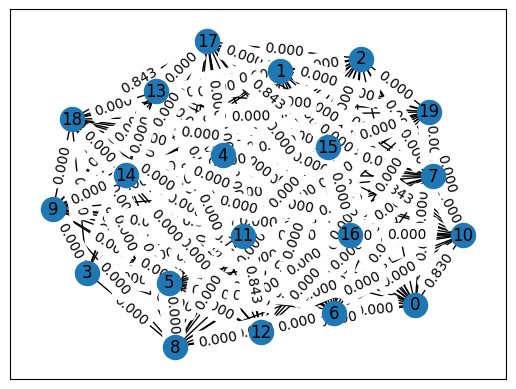

Iteration 20:
Pheromone (0, 1): 0.000
Pheromone (0, 2): 0.000
Pheromone (0, 3): 0.000
Pheromone (0, 4): 0.000
Pheromone (0, 5): 0.000
Pheromone (0, 6): 0.000
Pheromone (0, 7): 0.000
Pheromone (0, 8): 0.000
Pheromone (0, 9): 0.000
Pheromone (0, 10): 0.830
Pheromone (0, 11): 0.000
Pheromone (0, 12): 0.000
Pheromone (0, 13): 0.000
Pheromone (0, 14): 0.000
Pheromone (0, 15): 0.000
Pheromone (0, 16): 0.000
Pheromone (0, 17): 0.000
Pheromone (0, 18): 0.000
Pheromone (0, 19): 0.000
Pheromone (1, 2): 0.000
Pheromone (1, 3): 0.000
Pheromone (1, 4): 0.000
Pheromone (1, 5): 0.000
Pheromone (1, 6): 0.000
Pheromone (1, 7): 0.000
Pheromone (1, 8): 0.000
Pheromone (1, 9): 0.843
Pheromone (1, 10): 0.000
Pheromone (1, 11): 0.000
Pheromone (1, 12): 0.000
Pheromone (1, 13): 0.000
Pheromone (1, 14): 0.000
Pheromone (1, 15): 0.000
Pheromone (1, 16): 0.000
Pheromone (1, 17): 0.000
Pheromone (1, 18): 0.000
Pheromone (1, 19): 0.000
Pheromone (2, 3): 0.000
Pheromone (2, 4): 0.000
Pheromone (2, 5): 0.000
Pherom

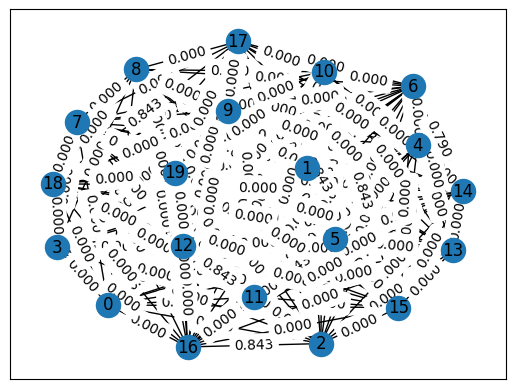

Iteration 30:
Pheromone (0, 1): 0.000
Pheromone (0, 2): 0.000
Pheromone (0, 3): 0.000
Pheromone (0, 4): 0.000
Pheromone (0, 5): 0.000
Pheromone (0, 6): 0.000
Pheromone (0, 7): 0.000
Pheromone (0, 8): 0.000
Pheromone (0, 9): 0.000
Pheromone (0, 10): 0.830
Pheromone (0, 11): 0.000
Pheromone (0, 12): 0.000
Pheromone (0, 13): 0.000
Pheromone (0, 14): 0.000
Pheromone (0, 15): 0.000
Pheromone (0, 16): 0.000
Pheromone (0, 17): 0.000
Pheromone (0, 18): 0.000
Pheromone (0, 19): 0.000
Pheromone (1, 2): 0.000
Pheromone (1, 3): 0.000
Pheromone (1, 4): 0.000
Pheromone (1, 5): 0.000
Pheromone (1, 6): 0.000
Pheromone (1, 7): 0.000
Pheromone (1, 8): 0.000
Pheromone (1, 9): 0.843
Pheromone (1, 10): 0.000
Pheromone (1, 11): 0.000
Pheromone (1, 12): 0.000
Pheromone (1, 13): 0.000
Pheromone (1, 14): 0.000
Pheromone (1, 15): 0.000
Pheromone (1, 16): 0.000
Pheromone (1, 17): 0.000
Pheromone (1, 18): 0.000
Pheromone (1, 19): 0.000
Pheromone (2, 3): 0.000
Pheromone (2, 4): 0.000
Pheromone (2, 5): 0.000
Pherom

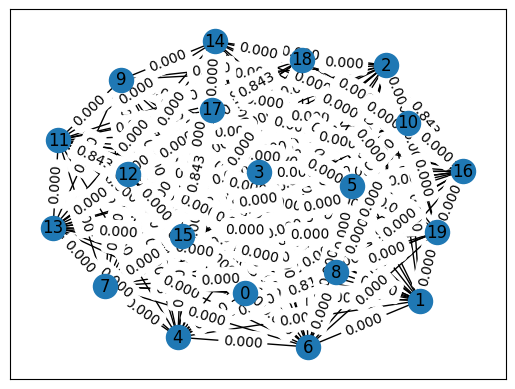

Iteration 40:
Pheromone (0, 1): 0.000
Pheromone (0, 2): 0.000
Pheromone (0, 3): 0.000
Pheromone (0, 4): 0.000
Pheromone (0, 5): 0.000
Pheromone (0, 6): 0.000
Pheromone (0, 7): 0.000
Pheromone (0, 8): 0.000
Pheromone (0, 9): 0.000
Pheromone (0, 10): 0.830
Pheromone (0, 11): 0.000
Pheromone (0, 12): 0.000
Pheromone (0, 13): 0.000
Pheromone (0, 14): 0.000
Pheromone (0, 15): 0.000
Pheromone (0, 16): 0.000
Pheromone (0, 17): 0.000
Pheromone (0, 18): 0.000
Pheromone (0, 19): 0.000
Pheromone (1, 2): 0.000
Pheromone (1, 3): 0.000
Pheromone (1, 4): 0.000
Pheromone (1, 5): 0.000
Pheromone (1, 6): 0.000
Pheromone (1, 7): 0.000
Pheromone (1, 8): 0.000
Pheromone (1, 9): 0.843
Pheromone (1, 10): 0.000
Pheromone (1, 11): 0.000
Pheromone (1, 12): 0.000
Pheromone (1, 13): 0.000
Pheromone (1, 14): 0.000
Pheromone (1, 15): 0.000
Pheromone (1, 16): 0.000
Pheromone (1, 17): 0.000
Pheromone (1, 18): 0.000
Pheromone (1, 19): 0.000
Pheromone (2, 3): 0.000
Pheromone (2, 4): 0.000
Pheromone (2, 5): 0.000
Pherom

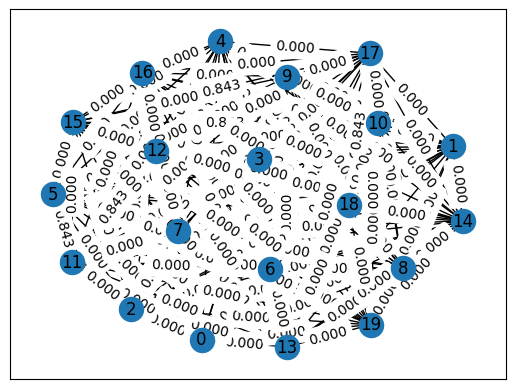

Iteration 50:
Pheromone (0, 1): 0.000
Pheromone (0, 2): 0.000
Pheromone (0, 3): 0.000
Pheromone (0, 4): 0.000
Pheromone (0, 5): 0.000
Pheromone (0, 6): 0.000
Pheromone (0, 7): 0.000
Pheromone (0, 8): 0.000
Pheromone (0, 9): 0.000
Pheromone (0, 10): 0.830
Pheromone (0, 11): 0.000
Pheromone (0, 12): 0.000
Pheromone (0, 13): 0.000
Pheromone (0, 14): 0.000
Pheromone (0, 15): 0.000
Pheromone (0, 16): 0.000
Pheromone (0, 17): 0.000
Pheromone (0, 18): 0.000
Pheromone (0, 19): 0.000
Pheromone (1, 2): 0.000
Pheromone (1, 3): 0.000
Pheromone (1, 4): 0.000
Pheromone (1, 5): 0.000
Pheromone (1, 6): 0.000
Pheromone (1, 7): 0.000
Pheromone (1, 8): 0.000
Pheromone (1, 9): 0.843
Pheromone (1, 10): 0.000
Pheromone (1, 11): 0.000
Pheromone (1, 12): 0.000
Pheromone (1, 13): 0.000
Pheromone (1, 14): 0.000
Pheromone (1, 15): 0.000
Pheromone (1, 16): 0.000
Pheromone (1, 17): 0.000
Pheromone (1, 18): 0.000
Pheromone (1, 19): 0.000
Pheromone (2, 3): 0.000
Pheromone (2, 4): 0.000
Pheromone (2, 5): 0.000
Pherom

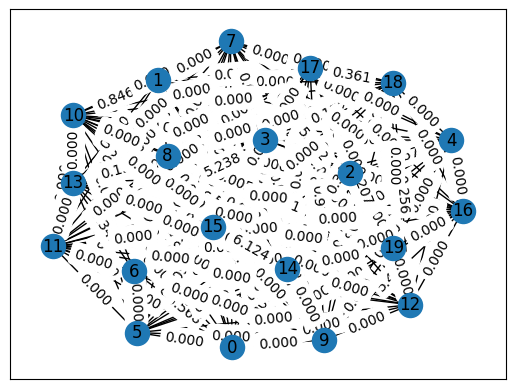

Iteration 10:
Pheromone (0, 1): 0.013
Pheromone (0, 2): 0.000
Pheromone (0, 3): 0.000
Pheromone (0, 4): 0.000
Pheromone (0, 5): 0.000
Pheromone (0, 6): 6.568
Pheromone (0, 7): 0.000
Pheromone (0, 8): 0.000
Pheromone (0, 9): 0.000
Pheromone (0, 10): 0.000
Pheromone (0, 11): 0.000
Pheromone (0, 12): 0.000
Pheromone (0, 13): 0.000
Pheromone (0, 14): 0.000
Pheromone (0, 15): 0.000
Pheromone (0, 16): 0.000
Pheromone (0, 17): 0.000
Pheromone (0, 18): 0.000
Pheromone (0, 19): 0.000
Pheromone (1, 2): 0.000
Pheromone (1, 3): 0.000
Pheromone (1, 4): 0.000
Pheromone (1, 5): 0.000
Pheromone (1, 6): 0.000
Pheromone (1, 7): 0.000
Pheromone (1, 8): 0.000
Pheromone (1, 9): 0.000
Pheromone (1, 10): 0.846
Pheromone (1, 11): 0.000
Pheromone (1, 12): 5.166
Pheromone (1, 13): 0.000
Pheromone (1, 14): 0.000
Pheromone (1, 15): 0.000
Pheromone (1, 16): 0.000
Pheromone (1, 17): 0.000
Pheromone (1, 18): 0.000
Pheromone (1, 19): 0.000
Pheromone (2, 3): 0.000
Pheromone (2, 4): 1.257
Pheromone (2, 5): 0.000
Pherom

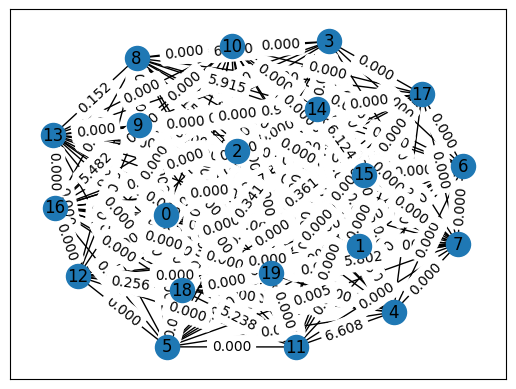

Iteration 20:
Pheromone (0, 1): 0.013
Pheromone (0, 2): 0.000
Pheromone (0, 3): 0.000
Pheromone (0, 4): 0.000
Pheromone (0, 5): 0.000
Pheromone (0, 6): 6.568
Pheromone (0, 7): 0.000
Pheromone (0, 8): 0.000
Pheromone (0, 9): 0.000
Pheromone (0, 10): 0.000
Pheromone (0, 11): 0.000
Pheromone (0, 12): 0.000
Pheromone (0, 13): 0.000
Pheromone (0, 14): 0.000
Pheromone (0, 15): 0.000
Pheromone (0, 16): 0.000
Pheromone (0, 17): 0.000
Pheromone (0, 18): 0.000
Pheromone (0, 19): 0.000
Pheromone (1, 2): 0.000
Pheromone (1, 3): 0.000
Pheromone (1, 4): 0.000
Pheromone (1, 5): 0.000
Pheromone (1, 6): 0.000
Pheromone (1, 7): 0.000
Pheromone (1, 8): 0.000
Pheromone (1, 9): 0.000
Pheromone (1, 10): 0.846
Pheromone (1, 11): 0.000
Pheromone (1, 12): 5.166
Pheromone (1, 13): 0.000
Pheromone (1, 14): 0.000
Pheromone (1, 15): 0.000
Pheromone (1, 16): 0.000
Pheromone (1, 17): 0.000
Pheromone (1, 18): 0.000
Pheromone (1, 19): 0.000
Pheromone (2, 3): 0.000
Pheromone (2, 4): 1.257
Pheromone (2, 5): 0.000
Pherom

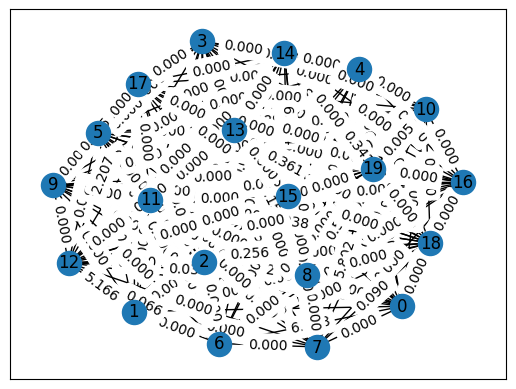

Iteration 30:
Pheromone (0, 1): 0.013
Pheromone (0, 2): 0.000
Pheromone (0, 3): 0.000
Pheromone (0, 4): 0.000
Pheromone (0, 5): 0.000
Pheromone (0, 6): 6.568
Pheromone (0, 7): 0.000
Pheromone (0, 8): 0.000
Pheromone (0, 9): 0.000
Pheromone (0, 10): 0.000
Pheromone (0, 11): 0.000
Pheromone (0, 12): 0.000
Pheromone (0, 13): 0.000
Pheromone (0, 14): 0.000
Pheromone (0, 15): 0.000
Pheromone (0, 16): 0.000
Pheromone (0, 17): 0.000
Pheromone (0, 18): 0.000
Pheromone (0, 19): 0.000
Pheromone (1, 2): 0.000
Pheromone (1, 3): 0.000
Pheromone (1, 4): 0.000
Pheromone (1, 5): 0.000
Pheromone (1, 6): 0.000
Pheromone (1, 7): 0.000
Pheromone (1, 8): 0.000
Pheromone (1, 9): 0.000
Pheromone (1, 10): 0.846
Pheromone (1, 11): 0.000
Pheromone (1, 12): 5.166
Pheromone (1, 13): 0.000
Pheromone (1, 14): 0.000
Pheromone (1, 15): 0.000
Pheromone (1, 16): 0.000
Pheromone (1, 17): 0.000
Pheromone (1, 18): 0.000
Pheromone (1, 19): 0.000
Pheromone (2, 3): 0.000
Pheromone (2, 4): 1.257
Pheromone (2, 5): 0.000
Pherom

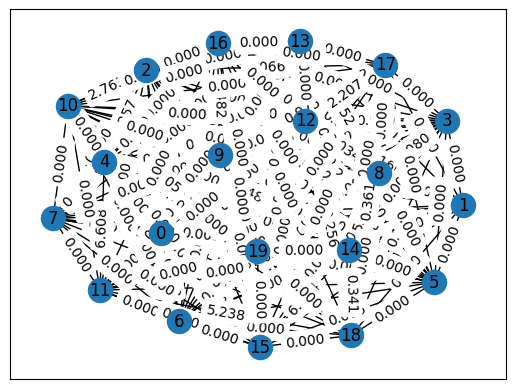

Iteration 40:
Pheromone (0, 1): 0.013
Pheromone (0, 2): 0.000
Pheromone (0, 3): 0.000
Pheromone (0, 4): 0.000
Pheromone (0, 5): 0.000
Pheromone (0, 6): 6.568
Pheromone (0, 7): 0.000
Pheromone (0, 8): 0.000
Pheromone (0, 9): 0.000
Pheromone (0, 10): 0.000
Pheromone (0, 11): 0.000
Pheromone (0, 12): 0.000
Pheromone (0, 13): 0.000
Pheromone (0, 14): 0.000
Pheromone (0, 15): 0.000
Pheromone (0, 16): 0.000
Pheromone (0, 17): 0.000
Pheromone (0, 18): 0.000
Pheromone (0, 19): 0.000
Pheromone (1, 2): 0.000
Pheromone (1, 3): 0.000
Pheromone (1, 4): 0.000
Pheromone (1, 5): 0.000
Pheromone (1, 6): 0.000
Pheromone (1, 7): 0.000
Pheromone (1, 8): 0.000
Pheromone (1, 9): 0.000
Pheromone (1, 10): 0.846
Pheromone (1, 11): 0.000
Pheromone (1, 12): 5.166
Pheromone (1, 13): 0.000
Pheromone (1, 14): 0.000
Pheromone (1, 15): 0.000
Pheromone (1, 16): 0.000
Pheromone (1, 17): 0.000
Pheromone (1, 18): 0.000
Pheromone (1, 19): 0.000
Pheromone (2, 3): 0.000
Pheromone (2, 4): 1.257
Pheromone (2, 5): 0.000
Pherom

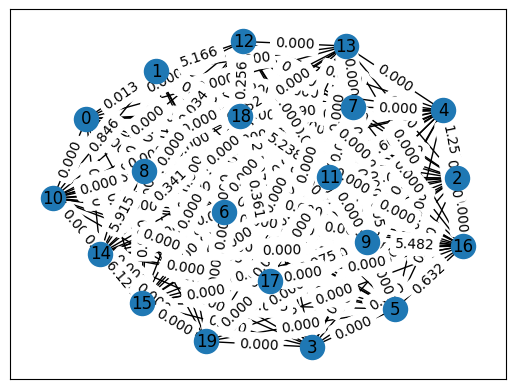

Iteration 50:
Pheromone (0, 1): 0.013
Pheromone (0, 2): 0.000
Pheromone (0, 3): 0.000
Pheromone (0, 4): 0.000
Pheromone (0, 5): 0.000
Pheromone (0, 6): 6.568
Pheromone (0, 7): 0.000
Pheromone (0, 8): 0.000
Pheromone (0, 9): 0.000
Pheromone (0, 10): 0.000
Pheromone (0, 11): 0.000
Pheromone (0, 12): 0.000
Pheromone (0, 13): 0.000
Pheromone (0, 14): 0.000
Pheromone (0, 15): 0.000
Pheromone (0, 16): 0.000
Pheromone (0, 17): 0.000
Pheromone (0, 18): 0.000
Pheromone (0, 19): 0.000
Pheromone (1, 2): 0.000
Pheromone (1, 3): 0.000
Pheromone (1, 4): 0.000
Pheromone (1, 5): 0.000
Pheromone (1, 6): 0.000
Pheromone (1, 7): 0.000
Pheromone (1, 8): 0.000
Pheromone (1, 9): 0.000
Pheromone (1, 10): 0.846
Pheromone (1, 11): 0.000
Pheromone (1, 12): 5.166
Pheromone (1, 13): 0.000
Pheromone (1, 14): 0.000
Pheromone (1, 15): 0.000
Pheromone (1, 16): 0.000
Pheromone (1, 17): 0.000
Pheromone (1, 18): 0.000
Pheromone (1, 19): 0.000
Pheromone (2, 3): 0.000
Pheromone (2, 4): 1.257
Pheromone (2, 5): 0.000
Pherom

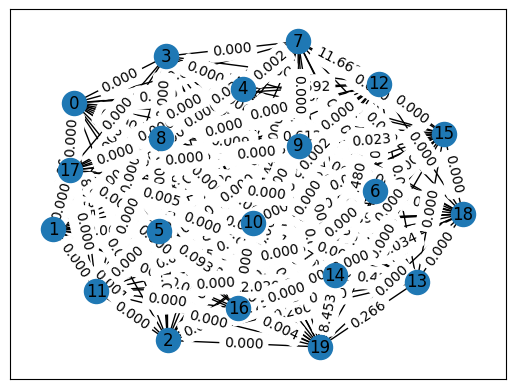

Iteration 10:
Pheromone (0, 1): 0.000
Pheromone (0, 2): 0.000
Pheromone (0, 3): 0.000
Pheromone (0, 4): 0.000
Pheromone (0, 5): 0.000
Pheromone (0, 6): 0.411
Pheromone (0, 7): 0.000
Pheromone (0, 8): 0.000
Pheromone (0, 9): 0.000
Pheromone (0, 10): 0.018
Pheromone (0, 11): 8.735
Pheromone (0, 12): 0.000
Pheromone (0, 13): 0.000
Pheromone (0, 14): 0.988
Pheromone (0, 15): 0.000
Pheromone (0, 16): 0.204
Pheromone (0, 17): 0.000
Pheromone (0, 18): 0.000
Pheromone (0, 19): 0.221
Pheromone (1, 2): 0.001
Pheromone (1, 3): 0.000
Pheromone (1, 4): 0.000
Pheromone (1, 5): 0.000
Pheromone (1, 6): 0.174
Pheromone (1, 7): 0.000
Pheromone (1, 8): 0.000
Pheromone (1, 9): 12.075
Pheromone (1, 10): 0.000
Pheromone (1, 11): 0.000
Pheromone (1, 12): 0.000
Pheromone (1, 13): 0.001
Pheromone (1, 14): 0.315
Pheromone (1, 15): 0.000
Pheromone (1, 16): 0.000
Pheromone (1, 17): 0.000
Pheromone (1, 18): 0.000
Pheromone (1, 19): 0.000
Pheromone (2, 3): 0.000
Pheromone (2, 4): 0.000
Pheromone (2, 5): 11.059
Pher

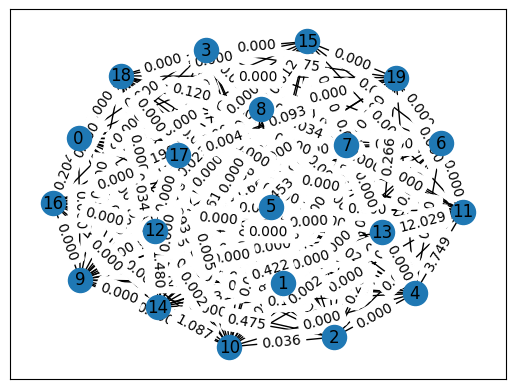

Iteration 20:
Pheromone (0, 1): 0.000
Pheromone (0, 2): 0.000
Pheromone (0, 3): 0.000
Pheromone (0, 4): 0.000
Pheromone (0, 5): 0.000
Pheromone (0, 6): 0.411
Pheromone (0, 7): 0.000
Pheromone (0, 8): 0.000
Pheromone (0, 9): 0.000
Pheromone (0, 10): 0.018
Pheromone (0, 11): 8.735
Pheromone (0, 12): 0.000
Pheromone (0, 13): 0.000
Pheromone (0, 14): 0.988
Pheromone (0, 15): 0.000
Pheromone (0, 16): 0.204
Pheromone (0, 17): 0.000
Pheromone (0, 18): 0.000
Pheromone (0, 19): 0.221
Pheromone (1, 2): 0.001
Pheromone (1, 3): 0.000
Pheromone (1, 4): 0.000
Pheromone (1, 5): 0.000
Pheromone (1, 6): 0.174
Pheromone (1, 7): 0.000
Pheromone (1, 8): 0.000
Pheromone (1, 9): 12.075
Pheromone (1, 10): 0.000
Pheromone (1, 11): 0.000
Pheromone (1, 12): 0.000
Pheromone (1, 13): 0.001
Pheromone (1, 14): 0.315
Pheromone (1, 15): 0.000
Pheromone (1, 16): 0.000
Pheromone (1, 17): 0.000
Pheromone (1, 18): 0.000
Pheromone (1, 19): 0.000
Pheromone (2, 3): 0.000
Pheromone (2, 4): 0.000
Pheromone (2, 5): 11.059
Pher

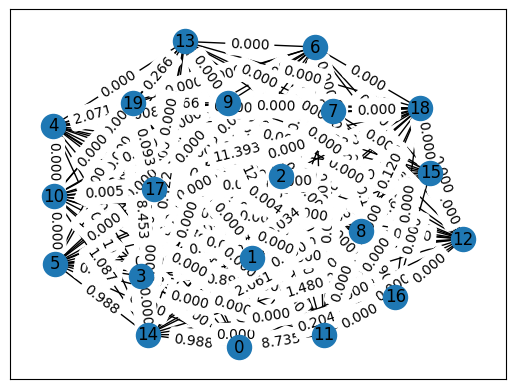

Iteration 30:
Pheromone (0, 1): 0.000
Pheromone (0, 2): 0.000
Pheromone (0, 3): 0.000
Pheromone (0, 4): 0.000
Pheromone (0, 5): 0.000
Pheromone (0, 6): 0.411
Pheromone (0, 7): 0.000
Pheromone (0, 8): 0.000
Pheromone (0, 9): 0.000
Pheromone (0, 10): 0.018
Pheromone (0, 11): 8.735
Pheromone (0, 12): 0.000
Pheromone (0, 13): 0.000
Pheromone (0, 14): 0.988
Pheromone (0, 15): 0.000
Pheromone (0, 16): 0.204
Pheromone (0, 17): 0.000
Pheromone (0, 18): 0.000
Pheromone (0, 19): 0.221
Pheromone (1, 2): 0.001
Pheromone (1, 3): 0.000
Pheromone (1, 4): 0.000
Pheromone (1, 5): 0.000
Pheromone (1, 6): 0.174
Pheromone (1, 7): 0.000
Pheromone (1, 8): 0.000
Pheromone (1, 9): 12.075
Pheromone (1, 10): 0.000
Pheromone (1, 11): 0.000
Pheromone (1, 12): 0.000
Pheromone (1, 13): 0.001
Pheromone (1, 14): 0.315
Pheromone (1, 15): 0.000
Pheromone (1, 16): 0.000
Pheromone (1, 17): 0.000
Pheromone (1, 18): 0.000
Pheromone (1, 19): 0.000
Pheromone (2, 3): 0.000
Pheromone (2, 4): 0.000
Pheromone (2, 5): 11.059
Pher

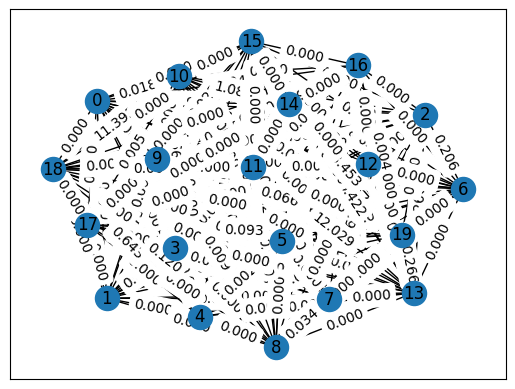

Iteration 40:
Pheromone (0, 1): 0.000
Pheromone (0, 2): 0.000
Pheromone (0, 3): 0.000
Pheromone (0, 4): 0.000
Pheromone (0, 5): 0.000
Pheromone (0, 6): 0.411
Pheromone (0, 7): 0.000
Pheromone (0, 8): 0.000
Pheromone (0, 9): 0.000
Pheromone (0, 10): 0.018
Pheromone (0, 11): 8.735
Pheromone (0, 12): 0.000
Pheromone (0, 13): 0.000
Pheromone (0, 14): 0.988
Pheromone (0, 15): 0.000
Pheromone (0, 16): 0.204
Pheromone (0, 17): 0.000
Pheromone (0, 18): 0.000
Pheromone (0, 19): 0.221
Pheromone (1, 2): 0.001
Pheromone (1, 3): 0.000
Pheromone (1, 4): 0.000
Pheromone (1, 5): 0.000
Pheromone (1, 6): 0.174
Pheromone (1, 7): 0.000
Pheromone (1, 8): 0.000
Pheromone (1, 9): 12.075
Pheromone (1, 10): 0.000
Pheromone (1, 11): 0.000
Pheromone (1, 12): 0.000
Pheromone (1, 13): 0.001
Pheromone (1, 14): 0.315
Pheromone (1, 15): 0.000
Pheromone (1, 16): 0.000
Pheromone (1, 17): 0.000
Pheromone (1, 18): 0.000
Pheromone (1, 19): 0.000
Pheromone (2, 3): 0.000
Pheromone (2, 4): 0.000
Pheromone (2, 5): 11.059
Pher

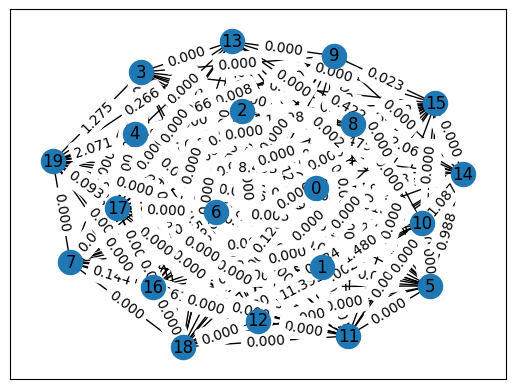

Iteration 50:
Pheromone (0, 1): 0.000
Pheromone (0, 2): 0.000
Pheromone (0, 3): 0.000
Pheromone (0, 4): 0.000
Pheromone (0, 5): 0.000
Pheromone (0, 6): 0.411
Pheromone (0, 7): 0.000
Pheromone (0, 8): 0.000
Pheromone (0, 9): 0.000
Pheromone (0, 10): 0.018
Pheromone (0, 11): 8.735
Pheromone (0, 12): 0.000
Pheromone (0, 13): 0.000
Pheromone (0, 14): 0.988
Pheromone (0, 15): 0.000
Pheromone (0, 16): 0.204
Pheromone (0, 17): 0.000
Pheromone (0, 18): 0.000
Pheromone (0, 19): 0.221
Pheromone (1, 2): 0.001
Pheromone (1, 3): 0.000
Pheromone (1, 4): 0.000
Pheromone (1, 5): 0.000
Pheromone (1, 6): 0.174
Pheromone (1, 7): 0.000
Pheromone (1, 8): 0.000
Pheromone (1, 9): 12.075
Pheromone (1, 10): 0.000
Pheromone (1, 11): 0.000
Pheromone (1, 12): 0.000
Pheromone (1, 13): 0.001
Pheromone (1, 14): 0.315
Pheromone (1, 15): 0.000
Pheromone (1, 16): 0.000
Pheromone (1, 17): 0.000
Pheromone (1, 18): 0.000
Pheromone (1, 19): 0.000
Pheromone (2, 3): 0.000
Pheromone (2, 4): 0.000
Pheromone (2, 5): 11.059
Pher

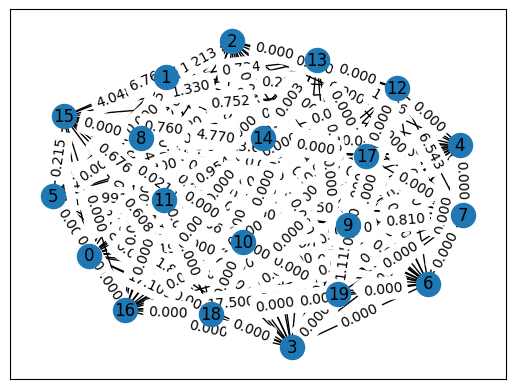

Iteration 10:
Pheromone (0, 1): 0.000
Pheromone (0, 2): 0.000
Pheromone (0, 3): 0.000
Pheromone (0, 4): 0.000
Pheromone (0, 5): 0.000
Pheromone (0, 6): 0.000
Pheromone (0, 7): 0.135
Pheromone (0, 8): 0.000
Pheromone (0, 9): 0.000
Pheromone (0, 10): 0.199
Pheromone (0, 11): 0.873
Pheromone (0, 12): 0.000
Pheromone (0, 13): 0.000
Pheromone (0, 14): 0.000
Pheromone (0, 15): 0.472
Pheromone (0, 16): 0.000
Pheromone (0, 17): 0.000
Pheromone (0, 18): 17.109
Pheromone (0, 19): 0.000
Pheromone (1, 2): 1.213
Pheromone (1, 3): 0.000
Pheromone (1, 4): 0.023
Pheromone (1, 5): 0.477
Pheromone (1, 6): 1.165
Pheromone (1, 7): 0.015
Pheromone (1, 8): 7.945
Pheromone (1, 9): 0.006
Pheromone (1, 10): 0.292
Pheromone (1, 11): 0.002
Pheromone (1, 12): 0.220
Pheromone (1, 13): 0.734
Pheromone (1, 14): 0.000
Pheromone (1, 15): 4.048
Pheromone (1, 16): 0.000
Pheromone (1, 17): 0.000
Pheromone (1, 18): 0.001
Pheromone (1, 19): 0.000
Pheromone (2, 3): 0.000
Pheromone (2, 4): 0.000
Pheromone (2, 5): 0.000
Phero

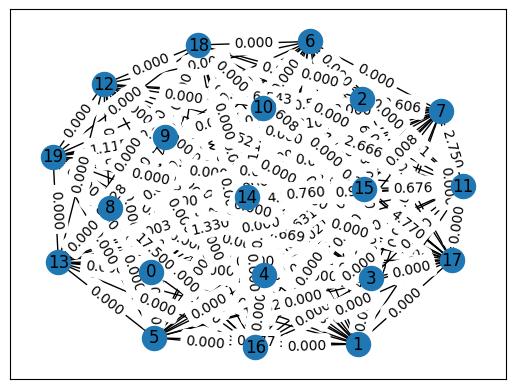

Iteration 20:
Pheromone (0, 1): 0.000
Pheromone (0, 2): 0.000
Pheromone (0, 3): 0.000
Pheromone (0, 4): 0.000
Pheromone (0, 5): 0.000
Pheromone (0, 6): 0.000
Pheromone (0, 7): 0.135
Pheromone (0, 8): 0.000
Pheromone (0, 9): 0.000
Pheromone (0, 10): 0.199
Pheromone (0, 11): 0.873
Pheromone (0, 12): 0.000
Pheromone (0, 13): 0.000
Pheromone (0, 14): 0.000
Pheromone (0, 15): 0.472
Pheromone (0, 16): 0.000
Pheromone (0, 17): 0.000
Pheromone (0, 18): 17.109
Pheromone (0, 19): 0.000
Pheromone (1, 2): 1.213
Pheromone (1, 3): 0.000
Pheromone (1, 4): 0.023
Pheromone (1, 5): 0.477
Pheromone (1, 6): 1.165
Pheromone (1, 7): 0.015
Pheromone (1, 8): 7.945
Pheromone (1, 9): 0.006
Pheromone (1, 10): 0.292
Pheromone (1, 11): 0.002
Pheromone (1, 12): 0.220
Pheromone (1, 13): 0.734
Pheromone (1, 14): 0.000
Pheromone (1, 15): 4.048
Pheromone (1, 16): 0.000
Pheromone (1, 17): 0.000
Pheromone (1, 18): 0.001
Pheromone (1, 19): 0.000
Pheromone (2, 3): 0.000
Pheromone (2, 4): 0.000
Pheromone (2, 5): 0.000
Phero

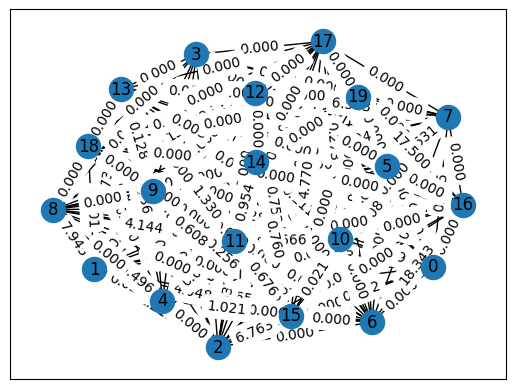

Iteration 30:
Pheromone (0, 1): 0.000
Pheromone (0, 2): 0.000
Pheromone (0, 3): 0.000
Pheromone (0, 4): 0.000
Pheromone (0, 5): 0.000
Pheromone (0, 6): 0.000
Pheromone (0, 7): 0.135
Pheromone (0, 8): 0.000
Pheromone (0, 9): 0.000
Pheromone (0, 10): 0.199
Pheromone (0, 11): 0.873
Pheromone (0, 12): 0.000
Pheromone (0, 13): 0.000
Pheromone (0, 14): 0.000
Pheromone (0, 15): 0.472
Pheromone (0, 16): 0.000
Pheromone (0, 17): 0.000
Pheromone (0, 18): 17.109
Pheromone (0, 19): 0.000
Pheromone (1, 2): 1.213
Pheromone (1, 3): 0.000
Pheromone (1, 4): 0.023
Pheromone (1, 5): 0.477
Pheromone (1, 6): 1.165
Pheromone (1, 7): 0.015
Pheromone (1, 8): 7.945
Pheromone (1, 9): 0.006
Pheromone (1, 10): 0.292
Pheromone (1, 11): 0.002
Pheromone (1, 12): 0.220
Pheromone (1, 13): 0.734
Pheromone (1, 14): 0.000
Pheromone (1, 15): 4.048
Pheromone (1, 16): 0.000
Pheromone (1, 17): 0.000
Pheromone (1, 18): 0.001
Pheromone (1, 19): 0.000
Pheromone (2, 3): 0.000
Pheromone (2, 4): 0.000
Pheromone (2, 5): 0.000
Phero

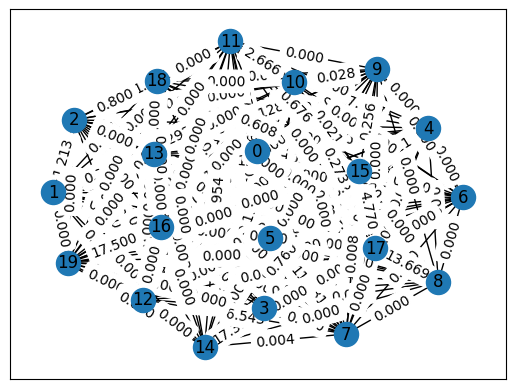

Iteration 40:
Pheromone (0, 1): 0.000
Pheromone (0, 2): 0.000
Pheromone (0, 3): 0.000
Pheromone (0, 4): 0.000
Pheromone (0, 5): 0.000
Pheromone (0, 6): 0.000
Pheromone (0, 7): 0.135
Pheromone (0, 8): 0.000
Pheromone (0, 9): 0.000
Pheromone (0, 10): 0.199
Pheromone (0, 11): 0.873
Pheromone (0, 12): 0.000
Pheromone (0, 13): 0.000
Pheromone (0, 14): 0.000
Pheromone (0, 15): 0.472
Pheromone (0, 16): 0.000
Pheromone (0, 17): 0.000
Pheromone (0, 18): 17.109
Pheromone (0, 19): 0.000
Pheromone (1, 2): 1.213
Pheromone (1, 3): 0.000
Pheromone (1, 4): 0.023
Pheromone (1, 5): 0.477
Pheromone (1, 6): 1.165
Pheromone (1, 7): 0.015
Pheromone (1, 8): 7.945
Pheromone (1, 9): 0.006
Pheromone (1, 10): 0.292
Pheromone (1, 11): 0.002
Pheromone (1, 12): 0.220
Pheromone (1, 13): 0.734
Pheromone (1, 14): 0.000
Pheromone (1, 15): 4.048
Pheromone (1, 16): 0.000
Pheromone (1, 17): 0.000
Pheromone (1, 18): 0.001
Pheromone (1, 19): 0.000
Pheromone (2, 3): 0.000
Pheromone (2, 4): 0.000
Pheromone (2, 5): 0.000
Phero

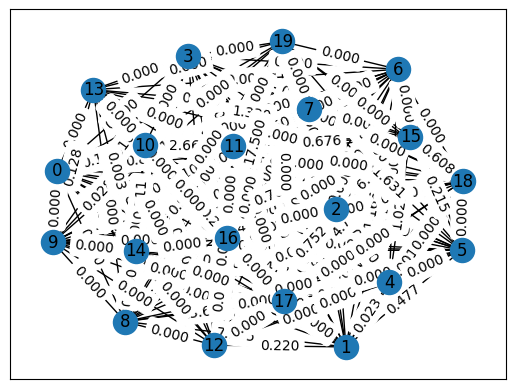

Iteration 50:
Pheromone (0, 1): 0.000
Pheromone (0, 2): 0.000
Pheromone (0, 3): 0.000
Pheromone (0, 4): 0.000
Pheromone (0, 5): 0.000
Pheromone (0, 6): 0.000
Pheromone (0, 7): 0.135
Pheromone (0, 8): 0.000
Pheromone (0, 9): 0.000
Pheromone (0, 10): 0.199
Pheromone (0, 11): 0.873
Pheromone (0, 12): 0.000
Pheromone (0, 13): 0.000
Pheromone (0, 14): 0.000
Pheromone (0, 15): 0.472
Pheromone (0, 16): 0.000
Pheromone (0, 17): 0.000
Pheromone (0, 18): 17.109
Pheromone (0, 19): 0.000
Pheromone (1, 2): 1.213
Pheromone (1, 3): 0.000
Pheromone (1, 4): 0.023
Pheromone (1, 5): 0.477
Pheromone (1, 6): 1.165
Pheromone (1, 7): 0.015
Pheromone (1, 8): 7.945
Pheromone (1, 9): 0.006
Pheromone (1, 10): 0.292
Pheromone (1, 11): 0.002
Pheromone (1, 12): 0.220
Pheromone (1, 13): 0.734
Pheromone (1, 14): 0.000
Pheromone (1, 15): 4.048
Pheromone (1, 16): 0.000
Pheromone (1, 17): 0.000
Pheromone (1, 18): 0.001
Pheromone (1, 19): 0.000
Pheromone (2, 3): 0.000
Pheromone (2, 4): 0.000
Pheromone (2, 5): 0.000
Phero

In [61]:
# Main code
num_cities = 20
num_ants_list = [1, 5, 10, 20]
num_iterations = 50
alpha = 1.0
beta = 2.0
rho = 0.5
q = 100.0

for num_ants in num_ants_list:
    distance_matrix = generate_distance_matrix(num_cities)
    aco = ACO(num_ants, num_iterations, alpha, beta, rho, q)
    best_tour, best_distance = aco.run(distance_matrix)



    if num_iterations >= 10:
        for iteration in range(10, num_iterations + 1, 10):
            aco.visualize_pheromone_map(aco.pheromone_matrix, num_cities)
            print(f"Iteration {iteration}:")
            aco.print_pheromone_map(aco.pheromone_matrix, num_cities)
            print(f"Optimal Path: {best_tour}")
            print()

In [63]:
print(f"Number of cites: 20")
for num_ants in num_ants_list:
    distance_matrix = generate_distance_matrix(num_cities)
    aco = ACO(num_ants, num_iterations, alpha, beta, rho, q)
    best_tour, best_distance = aco.run(distance_matrix)

    print(f"Number of ants: {num_ants}")
    print(f"Best tour: {best_tour}")
    print(f"Best distance: {best_distance}")
    print()

Number of cites: 20
Number of ants: 1
Best tour: [1, 5, 15, 0, 4, 11, 13, 3, 12, 16, 2, 6, 8, 17, 7, 9, 19, 18, 14, 10]
Best distance: 134.482706585973

Number of ants: 5
Best tour: [0, 16, 18, 8, 10, 11, 17, 9, 5, 19, 1, 4, 3, 6, 14, 2, 13, 7, 15, 12]
Best distance: 128.6289715522098

Number of ants: 10
Best tour: [13, 15, 11, 10, 3, 5, 2, 14, 18, 0, 16, 7, 19, 17, 6, 9, 1, 8, 4, 12]
Best distance: 177.71720267724837

Number of ants: 20
Best tour: [19, 10, 9, 1, 15, 14, 8, 7, 3, 13, 18, 16, 0, 6, 11, 2, 4, 12, 17, 5]
Best distance: 138.60831237363425

